---   
 <img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>
<h1 align="center">Course: Tools and Techniques for Data Science</h1>

---
<h3><div align="right">Instructor: Muhammad Arif Butt, Ph.D.</div></h3>    

<h1 align="center">Lecture 3.20 (Pandas-12)</h1>

<a href="https://colab.research.google.com/github/arifpucit/data-science/blob/master/Section-3-Python-for-Data-Scientists/Lec-3.20(Pandas-12-Working-with-Time-Series-Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" width="400" height="400"  src="images/pandas-apps.png"  >

## _Working with Time Series Data_

**Read Documentation for details:** 
https://pandas.pydata.org/docs/user_guide/timeseries.html#overview

In [1]:
# To install this library in Jupyter notebook
#import sys
#!{sys.executable} -m pip install pandas

In [2]:
import pandas as pd
pd.__version__ , pd.__path__

('1.4.1',
 ['/Users/arif/opt/anaconda3/envs/python10/lib/python3.10/site-packages/pandas'])

## Learning agenda of this notebook
1. Recap of Python's Built-in Time and Datetime Modules
    - Python Time module
    - Python Datetime module
    - Time Zones
2. Overview of Pandas Time Series Data Structures
3. Converting Strings to Pandas DateTime64 type
    - Convert a Scalar String to DateTime
    - Convert Pandas Series to DateTime
    - Handling Issues of DateTime Formats
    - Convert a Single Integer to Pandas DateTime
4. Practicing with a Simple Dataset
5. Practicing with UFO Dataset
6. Practicing with Crypto-Currency Dataset
7. Bonus:

## Overview of Time Series Data
#### What is Time Series Data?
- Time series data, also referred to as time-stamped data, is a sequence of data recorded at specific intervals of time (can be monthly, daily, hourly, ....).
- These data points are analyzed to forecast the future.
- It is time dependent.
- Time series data is effected by four components:
    - **Trend:** Increase or decrease in the series over a period of time. It persist over a long period of time. For Example, population growth of a country over years
    - **Seasonality:** Regular patterns of up and down fluctuations, e.g., Sale of icecream increases in every summer
    - **Cyclicity:** Variations that are caused at irregular intervals. Forexample, 5 years of economic growth, followed by 3 years of recession, followed by 7 years of economic growth, followed. by 1 year of recession
    - **Irregularity:** It refers to variations which occur due to unpredictable factors and also do not repeat in particular patterns. For examples, fluctuations caused by earthquakes, floods, wars, etc
   
#### What is time series Analysis?
- Time series analysis is the use of statistical methods to analyze time series data and extract meaningful statistics and characteristics about the data. Time series analysis helps identify trends, cycles, and seasonal variances to aid in the forecasting of a future event.
- Time series analysis can be useful to see how a given variable changes over time (while time itself, in time series data, is often the independent variable). Time series analysis can also be used to examine how the changes associated with the chosen data point compare to shifts in other variables over the same time period.

## 1. Recap of Python Modules Related to Date and Time

## a. Python Time Module
- Python Time module is principally for working with UNIX time stamps; expressed as a floating point number taken to be seconds since the unix epoch (00:00:00 UTC on 1 January 1970)

In [3]:
# Use `dir()` to get the list of methods in the Python `time` module
import time
print(dir(time))

['_STRUCT_TM_ITEMS', '__doc__', '__loader__', '__name__', '__package__', '__spec__', 'altzone', 'asctime', 'ctime', 'daylight', 'get_clock_info', 'gmtime', 'localtime', 'mktime', 'monotonic', 'monotonic_ns', 'perf_counter', 'perf_counter_ns', 'process_time', 'process_time_ns', 'sleep', 'strftime', 'strptime', 'struct_time', 'time', 'time_ns', 'timezone', 'tzname', 'tzset']


**(i) The `time.time()` method returns the current time in seconds since UNIX Epoch (00:00:00 UTC on 1 January 1970)**

In [4]:
seconds = time.time()
seconds

1645623933.013344

> You can achieve the same using the system `date` command and passing it `+%s` command line arugment

In [5]:
!date +%s

1645623933


**(ii) The `time.ctime()` method returns a date time string corresponding to the number of seconds passed to it since UNIX Epoch.**

In [6]:
# Showing `+5:00` hours time delta because of local time zone (PKT) differs from UTC with 5 hours
dtg1 = time.ctime(0)
dtg1

'Thu Jan  1 05:00:00 1970'

In [7]:
#If you pass the current elapsed seconds since UNIX epoch to the `ctime()` method, it returns current datetime
seconds = time.time()
dtg2 = time.ctime(seconds)
dtg2

'Wed Feb 23 18:45:33 2022'

In [8]:
#Get time using shell command
!date

Wed Feb 23 18:45:33 PKT 2022


## b. Python Datetime Module
The `datetime` module can support many of the same operations as `time` module, but provides a more object oriented set of types, and also has some limited support for time zones as well.

In [9]:
# use dir() to get the list of complete functions in datetime module
import datetime
print(dir(datetime))

['MAXYEAR', 'MINYEAR', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'sys', 'time', 'timedelta', 'timezone', 'tzinfo']


**(i) The `datetime.datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])` method is used to create any random date, along with time**

In [10]:
dtg = datetime.datetime(2021,12,31)
print(dtg)
print(type(dtg))

2021-12-31 00:00:00
<class 'datetime.datetime'>


In [11]:
print(datetime.datetime(2021, 12, 31, 4, 30, 54, 678))

2021-12-31 04:30:54.000678


**(ii)  The `time([hour[, minute[, second[, microsecond[, tzinfo]]]]]) ` methods returns a time object. All arguments are optional**

In [12]:
t1 = datetime.time(10, 15)
print(t1)
print(type(t1))

10:15:00
<class 'datetime.time'>


**(iii) You can explore some commonly used attributes related with the `<class 'datetime.time'>`.**
- `dtg.year:` returns the year
- `dtg.month:` returns the month
- `dtg.day:` returns the date
- `dtg.hour:` returns the hour
- `dtg.minute:` returns the minutes
- `dtg.second:` returns the seconds

In [13]:
dtg = datetime.datetime(2021, 12, 31, 4, 25, 58)
print(dtg)
print(type(dtg))

2021-12-31 04:25:58
<class 'datetime.datetime'>


In [14]:
dtg.year

2021

In [15]:
dtg.month

12

In [16]:
dtg.day

31

In [17]:
dtg.hour

4

In [18]:
dtg.minute

25

In [19]:
dtg.second

58

### c. Time Zones:

<img align="center" width="500" height="400"  src="images/tz.png"  >

- Since noon happens at different times in different parts of the world, therefore, the world is divided in different time zones.
- On Mac, Linux, and Windows operating systems, the information about these time zones is kept in files.
- Let me show you the contents of these files on my Mac system

In [20]:
# The UNIX Epoch in system local time is five hours ahead of mid night 1st Jan 1970
# (Coordinated Universal Time a successor to Greenwich Mean Time)
dtg1 = time.ctime(0)
dtg1

'Thu Jan  1 05:00:00 1970'

> You may have noticed that above cell does not display the exact UNIX epoch, i.e., mid-night 1st January 1970 rather is 5 hours ahead. This is because my machine is configured as per the time zone of Pakistan having a `+5:00` timedelta from Cooridnated Universtal Time (UTC a successor to GMT)

In [21]:
!ls /usr/share/zoneinfo/

+VERSION    Canada      GB          Iran        NZ-CHAT     UCT
Africa      Chile       GB-Eire     Israel      Navajo      US
America     Cuba        GMT         Jamaica     PRC         UTC
Antarctica  EET         GMT+0       Japan       PST8PDT     Universal
Arctic      EST         GMT-0       Kwajalein   Pacific     W-SU
Asia        EST5EDT     GMT0        Libya       Poland      WET
Atlantic    Egypt       Greenwich   MET         Portugal    Zulu
Australia   Eire        HST         MST         ROC         iso3166.tab
Brazil      Etc         Hongkong    MST7MDT     ROK         leapseconds
CET         Europe      Iceland     Mexico      Singapore   posixrules
CST6CDT     Factory     Indian      NZ          Turkey      zone.tab


In [22]:
!ls /usr/share/zoneinfo/Asia

Aden          Chongqing     Jerusalem     Novokuznetsk  Tashkent
Almaty        Chungking     Kabul         Novosibirsk   Tbilisi
Amman         Colombo       Kamchatka     Omsk          Tehran
Anadyr        Dacca         Karachi       Oral          Tel_Aviv
Aqtau         Damascus      Kashgar       Phnom_Penh    Thimbu
Aqtobe        Dhaka         Kathmandu     Pontianak     Thimphu
Ashgabat      Dili          Katmandu      Pyongyang     Tokyo
Ashkhabad     Dubai         Khandyga      Qatar         Tomsk
Atyrau        Dushanbe      Kolkata       Qostanay      Ujung_Pandang
Baghdad       Famagusta     Krasnoyarsk   Qyzylorda     Ulaanbaatar
Bahrain       Gaza          Kuala_Lumpur  Rangoon       Ulan_Bator
Baku          Harbin        Kuching       Riyadh        Urumqi
Bangkok       Hebron        Kuwait        Saigon        Ust-Nera
Barnaul       Ho_Chi_Minh   Macao         Sakhalin      Vientiane
Beirut        Hong_Kong     Macau         Samarkand     Vladivostok
Bishkek       Hovd       

>On all UNIX based systems (Mac, Linux), `TZ` is an environment variable that can be set to any of the above files to get the date of that appropriate zone. By default the system is configured to set it to the local time of the country

In [23]:
! date

Wed Feb 23 18:45:33 PKT 2022


In [24]:
! TZ=Asia/Karachi    date

Wed Feb 23 18:45:33 PKT 2022


In [25]:
! TZ=Asia/Calcutta   date

Wed Feb 23 19:15:33 IST 2022


In [26]:
! TZ=Asia/Tashkent   date

Wed Feb 23 18:45:33 +05 2022


>So you can observe if we run `date` command after setting the TZ variable to Karachi and Calcutta, their local date times are displayed. Being in different time zones Pakistan Standard Time is 30 minutes before India

## 2. Overview of Pandas Time Series Data Structures
- **Timestamp & DatetimeIndex:**
    - A `Timestamp` refer to particular moment in time, e.g., 28 July, 1969 at 11:00 am
    - It is a replacement of Python's built-in datetime object
    - The `pd.to_datetime()` method is used to create a `Timestamp` object
    - The `pd.date_range()` method is used to generate a `DatetimeIndex` object
- **Period & PeriodIndex:**
    - A `Period` refer to length of time between a start and end point, with each interval of uniform length
    - The `pd.to_period()` method is used to create a `Period` object
    - The `pd.period_range()` method is used to create a `PeriodIndex`
- **Timedelta & TimedeltaIndex:**
    - A `Timedelta` or duration refer to an exact length of time, e.g., a duration of 235.54 seconds
    - A `Timedelta` is created when you subtract two dates, while a `TimedeltaIndex` is created when you subtract two Periods

## 3. Converting Strings to Pandas Timestamp Object
- Pandas `pd.to_datetime()` method is used to convert its only required argument `arg` to a Timestamp object.

```
pd.to_datetime(arg, format=None, errors='raise', unit=None, origin='unix')
```
- Where,
    - `arg` can be a string, Series, int, datetime, list, tuple, 1-d array, DataFrame/dict-like object to convert
    - `errors` {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
        - If `raise`, then invalid parsing will raise an exception.
        - If `coerce`, then invalid parsing will be set as NaT.
        - If `ignore`, then invalid parsing will return the input
    - `format`: Used if the `arg` is not in the format as expected by the method
    - `unit`: Used if the `arg` is integer and can be (D,s,ms,us,ns) passed since `origin` (default is `ns`)
    - `origin`: is the reference point from where you want to start counting your units from. The default value of `origin` is the UNIX epoch.

### a. Convert a Scalar String to Timestamp

In [27]:
#YYYY-MM-DD
import pandas as pd
str_date = '2022-03-06 08:30:15'
print(str_date)
print(type(str_date))

2022-03-06 08:30:15
<class 'str'>


In [28]:
ts = pd.to_datetime(str_date)
print(ts)
print(type(ts))

2022-03-06 08:30:15
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


**`pd.Timestamp Attributes`**

`Series.dt.[ts.]second`: Returns seconds

`ts.minute`: Returns year

`ts.hour`: Returns hour

`ts.day`: Returns day

`ts.month`: Returns month as January=1, December=12

`ts.year`: Returns the year of datetime object

`Series.dt.day_name()`: Returns name of the day as string

`Series.dt.month_name()`: Returns month as string

For details Read: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html

In [29]:
ts.year

2022

In [30]:
ts.month

3

In [31]:
ts.day

6

In [32]:
ts.month_name()

'March'

In [33]:
ts.hour

8

In [34]:
ts.minute

30

In [35]:
ts.quarter

1

>You can pass a list of strings containing dates to `pd.to_datetime()`, which will return a `DatetimeIndex` object

In [36]:
# If there is a invalid string that cannot be converted to a valid date, you will get an error
#pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'])

In [37]:
# Use `errors=coerce` to translate the remaining data and keep `NaT` for invalid string
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='coerce')

DatetimeIndex(['2017-01-05', '2017-01-06', 'NaT'], dtype='datetime64[ns]', freq=None)

### b. Convert Pandas Series of Strings to Series of Timestamps

In [38]:
# A pandas series having same date but in different formats
s1 = pd.Series(['2022-03-06 08:30', '2022/03/06 08:30', '6 March, 2022 08:30', 'Mar 06, 2022 08:30', '202203060830'])
type(s1)
s1

0       2022-03-06 08:30
1       2022/03/06 08:30
2    6 March, 2022 08:30
3     Mar 06, 2022 08:30
4           202203060830
dtype: object

In [39]:
# to_datetime() function will convert all these different formats into a common format
s2 = pd.to_datetime(s1)
s2

0   2022-03-06 08:30:00
1   2022-03-06 08:30:00
2   2022-03-06 08:30:00
3   2022-03-06 08:30:00
4   2022-03-06 08:30:00
dtype: datetime64[ns]

In [40]:
type(s2)

pandas.core.series.Series

In [41]:
type(s2[0])

pandas._libs.tslibs.timestamps.Timestamp

In [42]:
s2[0].day, s2[0].month

(6, 3)

### c. Handling Issues of DateTime Formats
From above examples, it appears that `pd.to_datetime()` works fine for all date formats. Let us try storing  6 March, 2022 as '06/03/2022' or '06-03-2022'

**(i) Problem 1:**

In [43]:
ts = pd.to_datetime('06-03-2022')
ts

Timestamp('2022-06-03 00:00:00')

In [44]:
ts.day, ts.month

(3, 6)

**Oops!**, Pandas `to_datetime()` method has converted the string to datetime, but interpreted it as 3 June 2022
>The `pd.to_datetime()` by default, will parse string with month first (MM/DD, MM DD, or MM-DD) format

In [45]:
# Intelligence
ts = pd.to_datetime('26-03-2022')
ts.day, ts.month

/var/folders/1t/g3ylw8h50cjdqmk5d6jh1qmm0000gn/T/ipykernel_11456/3152508908.py:2: UserWarning: Parsing '26-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  ts = pd.to_datetime('26-03-2022')


(26, 3)

**(ii) Problem 2:**

In [46]:
#ts = pd.to_datetime('2022-03-06 08-PM')

**Oops again**!, Pandas `to_datetime()` method has raised an error saying `ParserError: Unknown string format: 2022-03-06 08-PM`
>It seems that `pd.to_datetime()` expects the time to be in 24 hours clock and not if the time is mentioned using AM (Ante-Meridiem meaning before Midday) or PM (Post-Meridiem, meaning after midday)

**(iii) Solution of above two Problems:**
>Pass an appropriate `format string` to the `format` argument of the `pd.to_datetime()` method. The format string need to be prepared as per the string date format.
Visit this link to see for Format codes: https://pandas.pydata.org/docs/reference/api/pandas.Period.strftime.html

In [47]:
# Passing appropriate format string will resolve above two problems
ts = pd.to_datetime('06-03-2022 08-PM', format = '%d-%m-%Y %I-%p')

In [48]:
ts

Timestamp('2022-03-06 20:00:00')

In [49]:
ts.day, ts.month

(6, 3)

### d. Convert a Single Integer to Pandas Timestamp
- Pandas `pd.to_datetime()` method can also be used to convert the first argument passed as integer to Pandas `Timestamp` object. 
- The `unit` argument tells about the unit of the `arg`, and it can be seconds, days or years
- The `origin` argument can be any reference point from where you want to start counting your units from. The default value of `origin` is the UNIX epoch.
```
pd.to_datetime(arg, format=None, unit=None, origin='unix')
```

In [50]:
!date +%s

1645623934


In [51]:
ts = pd.to_datetime(1645594235, unit='ms', origin='unix')
ts

Timestamp('1970-01-20 01:06:34.235000')

>You can mention the origin as some other reference point of your choice

In [52]:
ts = pd.to_datetime(10, unit='D', origin='2022-01-01')
ts

Timestamp('2022-01-11 00:00:00')

## 4. Practicing with a Simple Dataset

### a.  Option 1: Read the Dataset as such and then convert the Column Datatype to Timestamp64

**Example 1:** A dataset with datetime in a format as expected by `pd.to_datetime()`

In [53]:
# yyyy-mm-dd hr:min
! cat datasets/datetime1.csv





Shaista,2022.03.06 18:05,Peshawer,Female

In [54]:
import pandas as pd
df = pd.read_csv("datasets/datetime1.csv")
df

,name,dob,address,gender
0,Khurram,2022-03-06 21:10,Lahore,Male
1,Fatima,2022/03/06 08:30,Islamabad,Female
2,Huzaifa,2022-03-06 20:15,Karachi,Male
3,Shaista,2022.03.06 18:05,Peshawer,Female


In [55]:
df.dtypes

name       object
dob        object
address    object
gender     object
dtype: object

In [56]:
df.loc[:,'dob']

0    2022-03-06 21:10
1    2022/03/06 08:30
2    2022-03-06 20:15
3    2022.03.06 18:05
Name: dob, dtype: object

In [57]:
pd.to_datetime(df.loc[:,'dob'])

0   2022-03-06 21:10:00
1   2022-03-06 08:30:00
2   2022-03-06 20:15:00
3   2022-03-06 18:05:00
Name: dob, dtype: datetime64[ns]

In [58]:
df['dob'] = pd.to_datetime(df.loc[:,'dob'])

In [59]:
df.dtypes

name               object
dob        datetime64[ns]
address            object
gender             object
dtype: object

In [60]:
df

,name,dob,address,gender
0,Khurram,2022-03-06 21:10:00,Lahore,Male
1,Fatima,2022-03-06 08:30:00,Islamabad,Female
2,Huzaifa,2022-03-06 20:15:00,Karachi,Male
3,Shaista,2022-03-06 18:05:00,Peshawer,Female


**Example 2:** A dataset with datetime in a format NOT expected by `pd.to_datetime()`

In [61]:
# dd-mm-yyyy hr-PM
! cat datasets/datetime2.csv





Shaista,10-09-2005 02-AM,Peshawer,Female

In [62]:
df = pd.read_csv("datasets/datetime2.csv")
df

,name,dob,address,gender
0,Khurram,02-07-1980 08-PM,Lahore,Male
1,Fatima,15-06-2001 06-AM,Islamabad,Female
2,Huzaifa,08-04-1999 05-PM,Karachi,Male
3,Shaista,10-09-2005 02-AM,Peshawer,Female


In [63]:
df.dtypes

name       object
dob        object
address    object
gender     object
dtype: object

In [64]:
# Following LOC will now generate `ParserError: Unknown string format: 02-07-1980 08-PM`
#pd.to_datetime(df.loc[:,'dob'])

In [65]:
pd.to_datetime(df.loc[:,'dob'], format = '%d-%m-%Y %I-%p')

0   1980-07-02 20:00:00
1   2001-06-15 06:00:00
2   1999-04-08 17:00:00
3   2005-09-10 02:00:00
Name: dob, dtype: datetime64[ns]

In [66]:
df['dob'] = pd.to_datetime(df.loc[:,'dob'], format = '%d-%m-%Y %I-%p')

In [67]:
df.dtypes

name               object
dob        datetime64[ns]
address            object
gender             object
dtype: object

### b.  Option 2: Do the Conversion while Reading the CSV File

>**One can use the `parse_dates` and `date_parser` argument to the `pd.read_csv()` method to do this conversion while reading the csv file. However, the `pd.to_datetime()` method discussed above is recommended.**

## 5. Practicing with UFO Dataset

<img align="center" width="400" height="400"  src="images/ufo.png"  >

### a. Understanding the Dataset

In [68]:
import pandas as pd
df = pd.read_csv("datasets/ufo.csv")

In [69]:
df

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [70]:
df.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [72]:
# The Time column of the dataframe contains strings
df.loc[0,'Time']

'6/1/1930 22:00'

>Let us pass this column/series to the `pd.to_datetime()` method to convert the datatype to `datetime64`

In [73]:
pd.to_datetime(df.loc[:,'Time'])

0       1930-06-01 22:00:00
1       1930-06-30 20:00:00
2       1931-02-15 14:00:00
3       1931-06-01 13:00:00
4       1933-04-18 19:00:00
                ...        
18236   2000-12-31 23:00:00
18237   2000-12-31 23:00:00
18238   2000-12-31 23:45:00
18239   2000-12-31 23:45:00
18240   2000-12-31 23:59:00
Name: Time, Length: 18241, dtype: datetime64[ns]

In [74]:
df['Time'] = pd.to_datetime(df.loc[:,'Time'])

In [75]:
df.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

**Suppose I want to display only those UFO sightings that has been seen after 28 October 2000**

In [76]:
# Use Boolean Indexing (Can compare a string with datetime object)
df.loc[df.Time >= '2000/10/28', :]

,City,Colors Reported,Shape Reported,State,Time
17791,Lake Worth,YELLOW,LIGHT,FL,2000-10-28 00:00:00
17792,Springfield,NaN,CIGAR,MO,2000-10-28 00:00:00
17793,Laurel,BLUE,SPHERE,MD,2000-10-28 01:00:00
17794,Portland,NaN,SPHERE,ME,2000-10-28 10:30:00
17795,Kintnersville,ORANGE,OTHER,PA,2000-10-28 15:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [77]:
# Create a datetime object to be used for comparison
ts = pd.to_datetime('2000/10/28')
df.loc[df.Time >= ts, :]

,City,Colors Reported,Shape Reported,State,Time
17791,Lake Worth,YELLOW,LIGHT,FL,2000-10-28 00:00:00
17792,Springfield,NaN,CIGAR,MO,2000-10-28 00:00:00
17793,Laurel,BLUE,SPHERE,MD,2000-10-28 01:00:00
17794,Portland,NaN,SPHERE,ME,2000-10-28 10:30:00
17795,Kintnersville,ORANGE,OTHER,PA,2000-10-28 15:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


**Suppose I want to display only those UFO sightings that has been seen between 1st March 1995 and 06 March 1995**

In [78]:
# Create a datetime object to be used for comparison
ts1 = pd.to_datetime('1995/03/1')
ts2 = pd.to_datetime('1995/03/7')
df.loc[(df.Time >= ts1) & (df.Time <= ts2), :]

,City,Colors Reported,Shape Reported,State,Time
7860,Greenville,NaN,LIGHT,IL,1995-03-01 21:00:00
7861,Sedalia,NaN,NaN,MO,1995-03-01 21:00:00
7862,Redmond,RED,NaN,WA,1995-03-02 22:30:00
7863,Prescott Valley,NaN,OVAL,AZ,1995-03-04 00:00:00
7864,Folsom,NaN,NaN,NJ,1995-03-04 16:32:00
7865,Anaheim,NaN,OTHER,CA,1995-03-05 12:00:00
7866,Columbus,NaN,NaN,OH,1995-03-06 00:55:00
7867,Hilltop,NaN,NaN,NJ,1995-03-06 19:00:00
7868,Florence,NaN,NaN,OR,1995-03-06 19:10:00
7869,Mountain City,NaN,NaN,TN,1995-03-06 19:45:00


**Suppose I want to display the record of the maximum date under the `Time` column**

In [79]:
ts = df.Time.max()
ts

Timestamp('2000-12-31 23:59:00')

In [80]:
df.loc[df.Time == ts]

,City,Colors Reported,Shape Reported,State,Time
18240,Ybor,NaN,OVAL,FL,2000-12-31 23:59:00


**Suppose I want to display the oldest record as per the `Time` column**

In [81]:
ts = df.Time.min()
ts

Timestamp('1930-06-01 22:00:00')

In [82]:
df.loc[df.Time == ts]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00


**Suppose I want to check out the difference between the oldest and the newest record as per the `Time` column**

In [83]:
td = df.Time.max() - df.Time.min()
print(td)
print(type(td))

25781 days 01:59:00
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


## 6. Practicing with Crypto-Currency Dataset

<img align="center" width="400" height="400"  src="images/cryptocurrency.png"  >

In [84]:
import pandas as pd
df = pd.read_csv("datasets/cryptodata.csv")
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [85]:
# The Date column of the dataframe contains strings
df.loc[0,'Date']

'2020-03-13 08-PM'

In [86]:
df.dtypes

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

### a. Convert the Datatype of Date Column to Datetime

>Let us pass this column/series to the `pd.to_datetime()` method to convert the datatype to `datetime64`

In [87]:
# ParserError: Unknown string format: 2020-03-13 08-PM
#pd.to_datetime(df.loc[:,'Date'])

In [88]:
pd.to_datetime(df.loc[:,'Date'], format = '%Y-%m-%d %I-%p')

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [89]:
df['Date'] = pd.to_datetime(df.loc[:,'Date'], format = '%Y-%m-%d %I-%p')

In [90]:
df.dtypes

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [91]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

**Let us create a new column in the dataframe that shows the day of week in each row**

In [92]:
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [93]:
df['dayofweek'] = df['Date'].dt.day_name()

In [94]:
df

,Date,Symbol,Open,High,Low,Close,Volume,dayofweek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


**Let us find the oldest and newest record in the dataframe**

In [95]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [96]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [97]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

**Let us find the records of the January 2020 only**

In [98]:
mask = (df['Date'] >= '2020-01-01') & (df['Date'] <= '2020-01-31')
mask

0        False
1        False
2        False
3        False
4        False
         ...  
23669    False
23670    False
23671    False
23672    False
23673    False
Name: Date, Length: 23674, dtype: bool

In [99]:
df.loc[mask]

,Date,Symbol,Open,High,Low,Close,Volume,dayofweek
1028,2020-01-31 00:00:00,ETHUSD,184.55,185.68,183.48,183.82,1107068.24,Friday
1029,2020-01-30 23:00:00,ETHUSD,186.62,186.89,182.99,184.55,1262371.00,Thursday
1030,2020-01-30 22:00:00,ETHUSD,185.03,186.63,183.90,186.62,992325.34,Thursday
1031,2020-01-30 21:00:00,ETHUSD,184.40,185.03,183.19,185.03,701167.77,Thursday
1032,2020-01-30 20:00:00,ETHUSD,181.26,185.14,181.26,184.40,2180199.04,Thursday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


### b. Set the Column `Date` as Row Index of Dataframe
- This will allow you to treat the entire dataset in the dataframe as a Time Series Data
    - Selecting/Indexing using strings
    - Slicing using `df[date1:date2]`
    - Use of `df.loc[date1:date2, :]`

In [100]:
df.set_index('Date', inplace=True)
df

,Symbol,Open,High,Low,Close,Volume,dayofweek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


>Now, since the data of the `Date` column has become the row indices of this dataframe, therefore, we can use `.loc[]` on the dates :)
- Since index is still unique so the searching will be done in O(1) time
- If non-unique but sorted the searching will take O(logn) time
- If non-unique and non-sorted the searching will take O(n) time

**(i) Selection:**

In [101]:
# retrieve data of july 2019
df.loc["2019-07-01"]

,Symbol,Open,High,Low,Close,Volume,dayofweek
Date,,,,,,,
2019-07-01 23:00:00,ETHUSD,289.24,295.93,289.24,293.70,2083299.02,Monday
2019-07-01 22:00:00,ETHUSD,291.17,291.31,288.10,289.24,1865830.49,Monday
2019-07-01 21:00:00,ETHUSD,288.82,292.61,288.82,291.17,1731914.78,Monday
2019-07-01 20:00:00,ETHUSD,281.38,290.94,281.38,288.82,3483143.68,Monday
2019-07-01 19:00:00,ETHUSD,284.73,284.97,278.75,281.38,3420031.90,Monday
2019-07-01 18:00:00,ETHUSD,282.89,285.76,281.50,284.73,1841330.22,Monday
2019-07-01 17:00:00,ETHUSD,283.39,285.39,280.51,282.89,2346140.58,Monday
2019-07-01 16:00:00,ETHUSD,284.49,287.48,282.01,283.39,3244834.65,Monday
2019-07-01 15:00:00,ETHUSD,280.76,286.74,278.65,284.49,6552331.53,Monday


In [102]:
# getting Volume of July 2019
df.loc["2019-07"].Volume

Date
2019-07-31 23:00:00    1066895.02
2019-07-31 22:00:00     328984.44
2019-07-31 21:00:00     492811.09
2019-07-31 20:00:00     391730.91
2019-07-31 19:00:00     417465.58
                          ...    
2019-07-01 04:00:00    1036527.82
2019-07-01 03:00:00    1465814.16
2019-07-01 02:00:00    1367256.41
2019-07-01 01:00:00    2293925.50
2019-07-01 00:00:00    4209855.92
Name: Volume, Length: 744, dtype: float64

In [103]:
# Volumn average in July 2021
df.loc["2019-07"].Volume.mean()

1482188.5834811835

**(ii) Slicing:**

In [104]:
# Slice data of January and February 2020
df.loc['2020-01':'2020-02', :]

,Symbol,Open,High,Low,Close,Volume,dayofweek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [105]:
# Get only the Close column showing closing of January and February 2020
df.loc['2020-01':'2020-02', 'Close']

Date
2020-02-29 23:00:00    217.31
2020-02-29 22:00:00    223.35
2020-02-29 21:00:00    223.48
2020-02-29 20:00:00    224.63
2020-02-29 19:00:00    225.31
                        ...  
2020-01-01 04:00:00    129.56
2020-01-01 03:00:00    129.57
2020-01-01 02:00:00    130.37
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.34
Name: Close, Length: 1440, dtype: float64

In [106]:
# Compute the mean
df.loc['2020-01':'2020-02', 'Close'].mean()

195.16559027777814

###  c. Resampling using `df.resample()` Method
- The `df.resample()` is a convenience method for frequency conversion and resampling of time series data. 
- The dataframe on which you call the `resample()` method must have a datetime-like index

In [107]:
df

,Symbol,Open,High,Low,Close,Volume,dayofweek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


>The given dataframe is showing data on hourly basis. Suppose for analysis purpose I need daily, or weekly, monthly, or yearly data as I am no longer interested in hourly stock prices. So we need to resample our data
>- Down Sampling
>- Up Sampling

In [108]:
# get the time series of Close column
df.loc[:, 'Close']

Date
2020-03-13 20:00:00    128.71
2020-03-13 19:00:00    129.94
2020-03-13 18:00:00    119.51
2020-03-13 17:00:00    124.47
2020-03-13 16:00:00    124.08
                        ...  
2017-07-01 15:00:00    272.57
2017-07-01 14:00:00    265.74
2017-07-01 13:00:00    268.79
2017-07-01 12:00:00    274.83
2017-07-01 11:00:00    275.01
Name: Close, Length: 23674, dtype: float64

In [109]:
# To get the maximum closing value on daily basis, we resample on Daily basis
df.loc[:, 'Close'].resample('D').mean()

Date
2017-07-01    265.284615
2017-07-02    269.782500
2017-07-03    278.882083
2017-07-04    276.743333
2017-07-05    265.025833
                 ...    
2020-03-09    200.818333
2020-03-10    201.577500
2020-03-11    195.910417
2020-03-12    152.763333
2020-03-13    124.060476
Freq: D, Name: Close, Length: 987, dtype: float64

In [110]:
# To get the maximum closing value on monthly basis, we resample on monthly basis
df.loc[:, 'Close'].resample('M').max()

Date
2017-07-31     292.54
2017-08-31     389.78
2017-09-30     395.54
2017-10-31     348.45
2017-11-30     508.82
2017-12-31     858.90
2018-01-31    1418.61
2018-02-28    1138.68
2018-03-31     875.99
2018-04-30     709.00
2018-05-31     828.00
2018-06-30     623.89
2018-07-31     508.23
2018-08-31     431.84
2018-09-30     301.51
2018-10-31     233.20
2018-11-30     220.36
2018-12-31     156.07
2019-01-31     159.43
2019-02-28     164.08
2019-03-31     144.99
2019-04-30     185.32
2019-05-31     287.08
2019-06-30     355.31
2019-07-31     317.14
2019-08-31     235.50
2019-09-30     221.90
2019-10-31     196.07
2019-11-30     193.66
2019-12-31     151.55
2020-01-31     186.62
2020-02-29     286.39
2020-03-31     247.62
Freq: M, Name: Close, dtype: float64

In [111]:
# To get the maximum closing value on yearly basis, we resample on yearly basis
df.loc[:, 'Close'].resample('Y').max()

Date
2017-12-31     858.90
2018-12-31    1418.61
2019-12-31     355.31
2020-12-31     286.39
Freq: A-DEC, Name: Close, dtype: float64

>In a similary fashion, we can apply any aggregate function on any of the columns of our time series data

<AxesSubplot:xlabel='Date'>

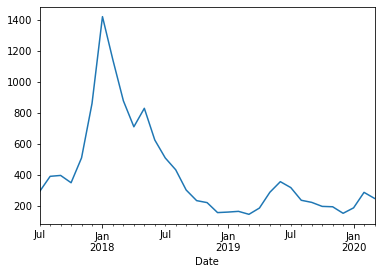

In [112]:
%matplotlib inline
df.loc[:, 'Close'].resample('M').max().plot()

<AxesSubplot:xlabel='Date'>

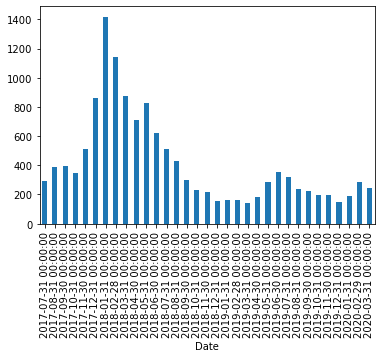

In [113]:
%matplotlib inline
df.loc[:, 'Close'].resample('M').max().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

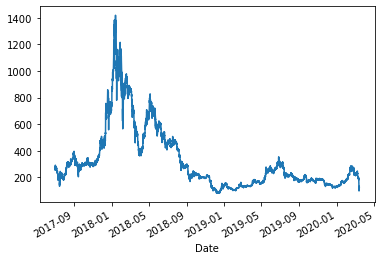

In [114]:
%matplotlib inline
df.loc[:, 'Close'].plot()

# Bonus:

## A. Creating a DatetimeIndex
- The `pd.date_range()` method returns a range of equally spaced time points as a DatetimeIndex, which is an immutable container for datetimes.

```
pd.date_range(start=None, end=None, periods=None, freq=None)
```

- Where,
    - `start` is the left bound (str or datetime)
    - `end` is the right bound (str or datetime)
    - `periods` is the number of periods to generate
    - `freq` can be `s`, `min`, `h`, `d`, `m`, `q`, `y` for seconds, minutes, ....


- Out of the four parameters: start, end, periods, and freq, exactly three must be specified

In [116]:
dti = pd.date_range(start='2022/1/1', periods=10, freq='h')
dti

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [117]:
dti = pd.date_range(start='2022/1/1', end='2022/1/31', freq='d')
dti

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', freq='D')

In [118]:
# here freq=B mean include the business days and exclude the weekends
dti = pd.date_range(start='2022/1/1', end='2022/1/31', freq='B')
dti

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-31'],
              dtype='datetime64[ns]', freq='B')

In [119]:
type(dti)

pandas.core.indexes.datetimes.DatetimeIndex

In [120]:
s = pd.Series(pd.date_range("2022-01-01", periods=10, freq="d"))
s

0   2022-01-01
1   2022-01-02
2   2022-01-03
3   2022-01-04
4   2022-01-05
5   2022-01-06
6   2022-01-07
7   2022-01-08
8   2022-01-09
9   2022-01-10
dtype: datetime64[ns]

In [121]:
s.dt.day_name()

0     Saturday
1       Sunday
2       Monday
3      Tuesday
4    Wednesday
5     Thursday
6       Friday
7     Saturday
8       Sunday
9       Monday
dtype: object

In [122]:
type(s[0])

pandas._libs.tslibs.timestamps.Timestamp

### b. A sample dataset w/o Datetime

In [123]:
import pandas as pd

# this dataframe has no datecolumn
df = pd.read_csv("datasets/no_date.csv")
df

,day,temperature,humidity
0,Monday,30,70
1,Tuesday,34,65
2,Wednesday,28,68
3,Thursday,35,72
4,Friday,32,69
5,Monday,37,71
6,Tuesday,26,70
7,Monday,33,66
8,Tuesday,28,76
9,Wednesday,29,54


In [124]:
df.shape

(20, 3)

### c. Create a DateTime Object and Set it as Index to make the above dataset a TimeSeries Data

In [125]:
dti = pd.date_range(start='2022/1/1', end='2022/1/20', freq='d')
dti

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20'],
              dtype='datetime64[ns]', freq='D')

In [126]:
# use the set_index function, and make the above created date ranges, index of your dataframe
df.set_index(dti, inplace=True)
df

,day,temperature,humidity
2022-01-01,Monday,30,70
2022-01-02,Tuesday,34,65
2022-01-03,Wednesday,28,68
2022-01-04,Thursday,35,72
2022-01-05,Friday,32,69
2022-01-06,Monday,37,71
2022-01-07,Tuesday,26,70
2022-01-08,Monday,33,66
2022-01-09,Tuesday,28,76
2022-01-10,Wednesday,29,54


Does the day column match with the dates? Can you think of a way to reset the day column as per the dates?

In [127]:
df['correct day'] = list(pd.Series(dti.day_name()))
df

,day,temperature,humidity,correct day
2022-01-01,Monday,30,70,Saturday
2022-01-02,Tuesday,34,65,Sunday
2022-01-03,Wednesday,28,68,Monday
2022-01-04,Thursday,35,72,Tuesday
2022-01-05,Friday,32,69,Wednesday
2022-01-06,Monday,37,71,Thursday
2022-01-07,Tuesday,26,70,Friday
2022-01-08,Monday,33,66,Saturday
2022-01-09,Tuesday,28,76,Sunday
2022-01-10,Wednesday,29,54,Monday


>**Students are advised to explore the Pandas `Period` and `PeriodIndex` data structures at their own**

## B. Creating a Period and Periodindex

### a. Have an Insight about Period

In [ ]:
import pandas as pd

# let us passed as argument to the Pandas Period function and notice the output
# A-DEC shows that 2021 is an annual period and end at December
y = pd.Period('2021')
y

In [ ]:
# you can check different attributes related to this period
# for instance check the start time, which is 1st january
y.start_time

In [ ]:
# check the end time which is obviously 31st december
y.end_time

In [ ]:
# check whether it is leap year
y.is_leap_year

In [ ]:
# you can also create a monthly period and check its start and end time
m = pd.Period('2021-8')
print("period: ", m)

print("start time: ",m.start_time)
print("end time: ",m.end_time)

# performing arithmatic operation
print("Next monthly period will be: ",m+1)


In [ ]:
# you can compute the daily and hourly period as well
import pandas as pd
d= pd.Period('2016-02-28', freq='D')
print(d)

print(d.start_time)

print(d.end_time)
print(d+1)

### b. Have an Insight about Period Index
The above discuused periods can also be used as index in a DataFrame

In [ ]:
# create a quarterly period b/w 2011 to 2017
idx = pd.period_range('2011', '2017', freq='q')
idx

In [ ]:
import numpy as np

# set this period as index of random series
ps = pd.Series(np.random.randint(10,100,len(idx)), idx)
ps

In [ ]:
# you can partially retrieve data or retrieve data in chunks using these periods
ps['2016']

In [ ]:
ps['2016':'2017']